## Diagramas de Frecuencia

los diagramas de frecuencia o histogramas son una representación categórica y númerica de la distribución de los datos

* Variables categóricas: Tablas de Frecuencia
* Variable numéricas: Percentiles, Deciles, Quintiles y Quartiles, outliers o valores extremos

In [1]:
import pandas as pd
import numpy as np
import scipy
import scipy.stats

In [2]:
df = pd.read_csv('D:/Users/luzbog/Desktop/bicicletas-compartidas.csv')

In [3]:
df.head()

,fecha,bicis-compartidas,temp-obs,sens-temp,hum,viento,codigo-clima,festivo,findesemana,cuartil-ano
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [4]:
df.columns

Index(['fecha', 'bicis-compartidas', 'temp-obs', 'sens-temp', 'hum', 'viento',
       'codigo-clima', 'festivo', 'findesemana', 'cuartil-ano'],
      dtype='object')

In [7]:
#Frecuencuas categoricas
ycat= df['cuartil-ano']

In [9]:
ycat = ycat.apply(lambda x : 'Cat-'+ str(int(x)))

In [11]:
ycat.head()

0    Cat-3
1    Cat-3
2    Cat-3
3    Cat-3
4    Cat-3
Name: cuartil-ano, dtype: object

In [14]:
valores, conteo_freq = np.unique(ycat, return_counts = True)

In [16]:
valores

array(['Cat-0', 'Cat-1', 'Cat-2', 'Cat-3'], dtype=object)

In [17]:
conteo_freq

array([4394, 4387, 4303, 4330], dtype=int64)

In [18]:
tabla_frecuencias= dict(zip(valores, conteo_freq))

In [20]:
tabla_frecuencias

{'Cat-0': 4394, 'Cat-1': 4387, 'Cat-2': 4303, 'Cat-3': 4330}

In [22]:
#vvariable numercica

ynum = df['viento'].copy()
np.min(ynum) , np.max(ynum)

(0.0, 56.5)

In [24]:
np.percentile(ynum, q=100)

56.5

In [25]:
np.percentile(ynum, q=0)

0.0

In [26]:
np.percentile(ynum, q=50)

15.0

In [28]:
np.median(ynum)

15.0

In [30]:
valores = [0,25,50,75,100]
np.percentile(ynum, q =valores)

array([ 0. , 10. , 15. , 20.5, 56.5])

In [31]:
#quintiles
valores_quintiles = [0,20,40,60,80,100]
np.percentile(ynum, q=valores_quintiles)

array([ 0. ,  9. , 13. , 17. , 22. , 56.5])

In [32]:
#deciles
valores_deci = list (range(0,110,10))
np.percentile(ynum, q= valores_deci)

array([ 0. ,  6.5,  9. , 11. , 13. , 15. , 17. , 19.5, 22. , 27. , 56.5])

In [33]:
#valores atipicos

y =df['bicis-compartidas']

In [34]:
y.describe()

count    17414.000000
mean      1143.101642
std       1085.108068
min          0.000000
25%        257.000000
50%        844.000000
75%       1671.750000
max       7860.000000
Name: bicis-compartidas, dtype: float64

In [35]:
#outlier : todo valor que este fuera del rango
Q1= np.percentile(ynum, q=25)
Q3= np.percentile(ynum, q=75)

RI = Q3-Q1

limi_inf= Q1 -1.5*RI
limi_sup= Q3 +1.5*RI

In [45]:
Q1

10.0

In [37]:
Q3

20.5

In [38]:
RI

10.5

In [39]:
limi_inf

-5.75

In [40]:
limi_sup

36.25

In [41]:
[limi_inf, limi_sup]

[-5.75, 36.25]

## Visualización

In [46]:
import scipy.stats #libreria para estadisticas basicas
import numpy as np #procesamiento númerico
import pandas as pd #manejo de dataframe



import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

(array([8.274e+03, 4.416e+03, 2.355e+03, 1.241e+03, 5.610e+02, 4.710e+02,
        8.800e+01, 2.000e+00, 3.000e+00, 3.000e+00]),
 array([   0.,  786., 1572., 2358., 3144., 3930., 4716., 5502., 6288.,
        7074., 7860.]),
 <a list of 10 Patch objects>)

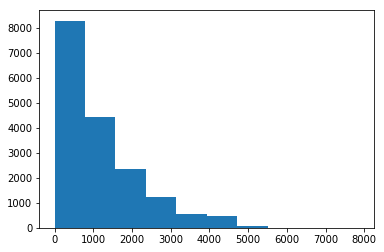

In [47]:
plt.hist(y)

In [48]:
df.head()

,fecha,bicis-compartidas,temp-obs,sens-temp,hum,viento,codigo-clima,festivo,findesemana,cuartil-ano
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


# Variables Categóricas

In [49]:
df.columns

Index(['fecha', 'bicis-compartidas', 'temp-obs', 'sens-temp', 'hum', 'viento',
       'codigo-clima', 'festivo', 'findesemana', 'cuartil-ano'],
      dtype='object')

In [50]:
y = df['cuartil-ano'].apply(lambda x:'cuartil-' + str(int(x)))

Text(0, 0.5, 'Frecuencia')

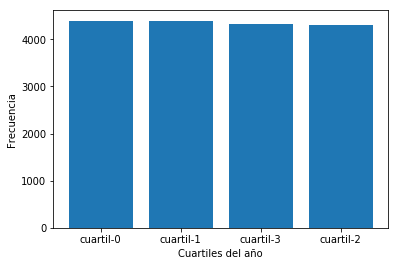

In [55]:
fig, ax=plt.subplots()
ax.bar(y.value_counts().index,y.value_counts() )
ax.set_xlabel('Cuartiles del año')
ax.set_ylabel('Frecuencia')

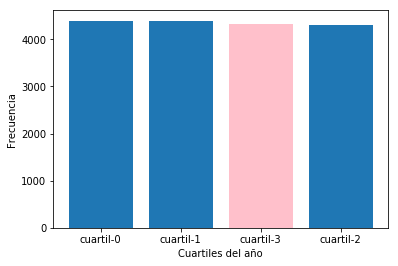

In [57]:
fig, ax=plt.subplots()
ax.bar(y.value_counts().index,y.value_counts() )
ax.set_xlabel('Cuartiles del año')
ax.set_ylabel('Frecuencia')
ax.patches[2].set_facecolor('pink')

Text(0.5, 1.0, 'Diagrama de pie')

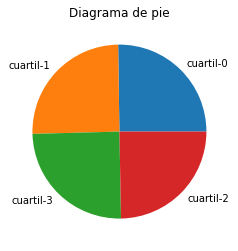

In [59]:
#diagrama de torta
fig, ax = plt.subplots()
ax.pie(y.value_counts(), labels = y.value_counts().index)
ax.set_title('Diagrama de pie')

Numericas

In [60]:
y = df['viento']

In [63]:
y.head()

0    6.0
1    5.0
2    0.0
3    0.0
4    6.5
Name: viento, dtype: float64

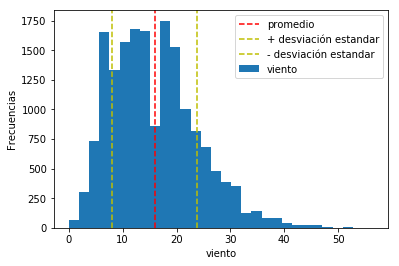

In [76]:
fig, ax= plt.subplots()
ax.hist(y, bins = 30)
ax.set_xlabel('viento')
ax.set_ylabel('Frecuencias')
plt.axvline(np.mean(y), c ='r', linestyle = '--', label='promedio')
plt.axvline(np.mean(y) +np.std(y), c ='y', linestyle = '--', label='+ desviación estandar')
plt.axvline(np.mean(y) -np.std(y), c ='y', linestyle = '--', label='- desviación estandar')
ax.legend()